In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv')

In [3]:
df = df.sort_values(by='value')

In [4]:
result = pd.concat([df.head(round(0.025*1304)), df.tail(round(0.025*1304))], ignore_index=True)

In [5]:
result

,date,value
0,2016-05-09,1201
1,2016-05-11,1716
2,2016-05-10,2329
3,2016-05-16,2591
4,2016-05-15,2927
...,...,...
61,2019-11-15,314101
62,2019-08-06,337325
63,2019-08-07,341595
64,2019-06-18,1166225


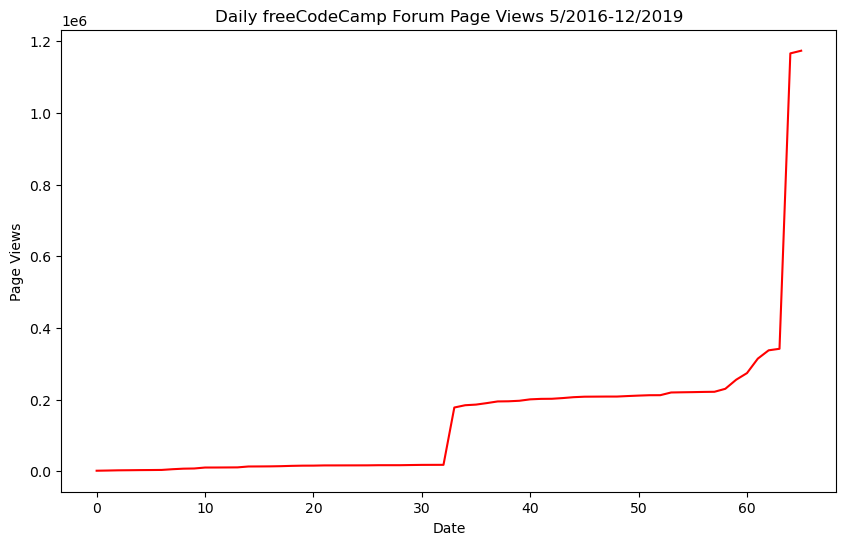

In [6]:
    fig, ax = plt.subplots(figsize=(10, 6))
    result.plot(ax=ax, color="r", legend=False)

    # Set titles and labels
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")

    # Save the plot to a file (optional)
    # plt.savefig("line_plot.png")

    # Show plot
    plt.show()


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [9]:
df

,date,value,year,month
0,2016-05-09,1201,2016,5
2,2016-05-11,1716,2016,5
1,2016-05-10,2329,2016,5
7,2016-05-16,2591,2016,5
6,2016-05-15,2927,2016,5
...,...,...,...,...
1285,2019-11-15,314101,2019,11
1184,2019-08-06,337325,2019,8
1185,2019-08-07,341595,2019,8
1135,2019-06-18,1166225,2019,6


In [10]:
grouped = df.groupby(['year', 'month'])['value'].sum().reset_index()
grouped[['month','value']]

,month,value
0,5,258582
1,6,573731
2,7,722741
3,8,962525
4,9,1244306
5,10,849348
6,11,1213459
7,12,862805
8,1,1016340
9,2,871166


In [11]:
month_dict = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
grouped['month'] = grouped['month'].replace(month_dict)

In [12]:
grouped['month'] = pd.Categorical(grouped['month'], categories=month_dict.values(), ordered=True)
grouped_sorted= grouped.sort_values(by='month')

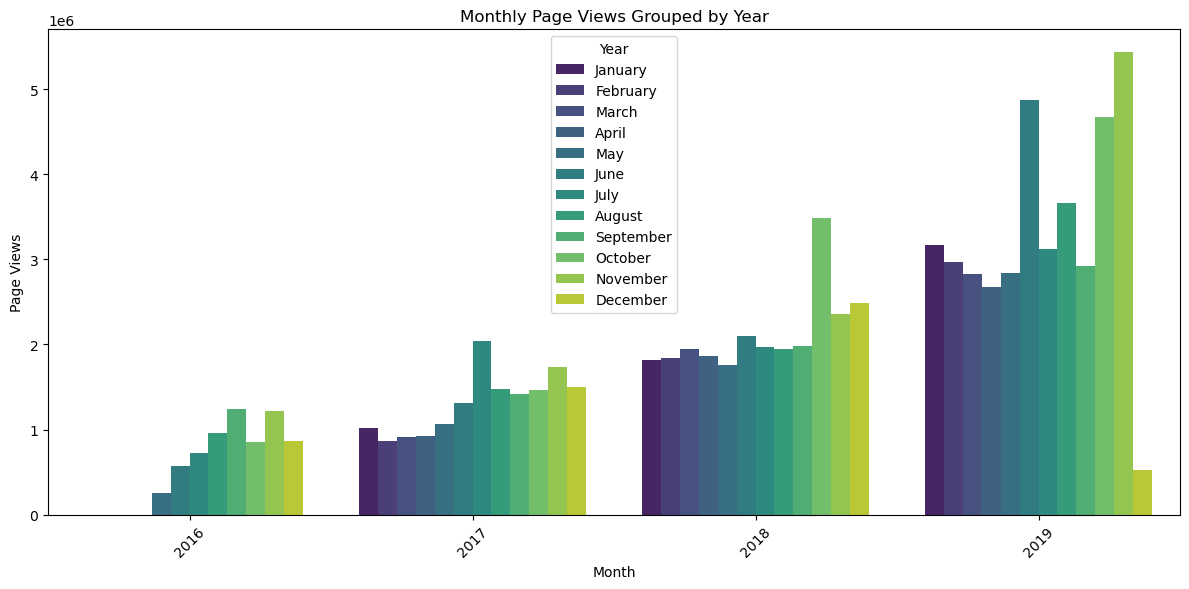

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_sorted, x='year', y='value', hue='month', palette='viridis')
plt.title('Monthly Page Views Grouped by Year')
plt.xlabel('Month')
plt.ylabel('Page Views')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

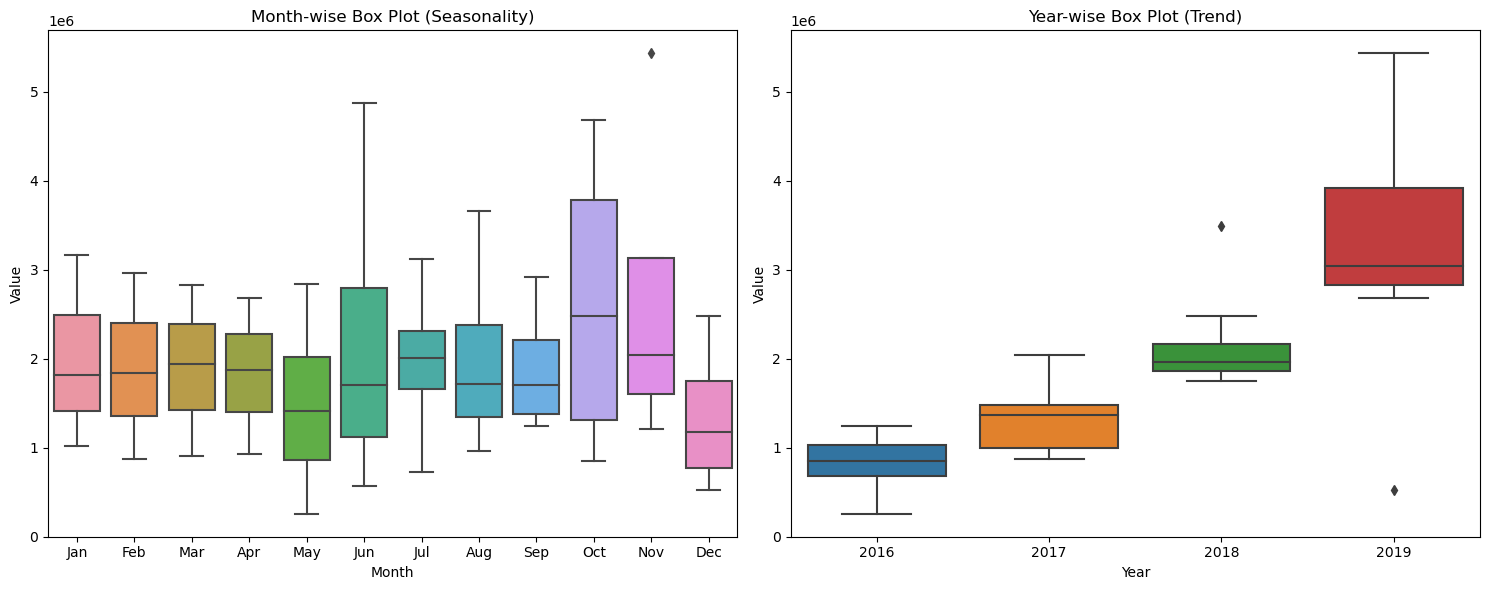

In [25]:

    # Year-wise Box Plot (Trend)
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 2)
    sns.boxplot(x='year', y='value', data=grouped)
    plt.title('Year-wise Box Plot (Trend)')
    plt.xlabel('Year')
    plt.ylabel('Value')

    # Month-wise Box Plot (Seasonality)
    plt.subplot(1, 2, 1)
    sns.boxplot(x='month', y='value', data=grouped)
    plt.title('Month-wise Box Plot (Seasonality)')
    plt.xlabel('Month')
    plt.ylabel('Value')
    plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    plt.tight_layout()
    plt.show()
